# Neural Network
- "가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력"
- "입력 데이터가 무엇인지 식별하는 처리 과정"
- "가중치를 갖는 층을 기준으로 명칭을 부름"
- "Activation function"
    - step-function, sigmoid, ReLu

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def step_function(x: np.array):
    y = x > 0
    return y.astype(int)

# 72p numpy broadcasting
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# relu는 왜 0을 기준으로 하는가?
# 음수를 왜 0으로 만드는가?
# 가중치를 학습할 때, w를 바꿔가면서 나오는 음수를 0으로 만들면 해당 입력된 부분은 예측할 부분의 음의 방향이므로, 고려하지 않는다는 뜻으로 사용할 수 있어서 그런가?
def relu(x):
    return np.maximum(0, x)

def identity_function(x):
    return x

def softmax(a):
    # C는 오버플로를 방지하기 위한 상수
    C = np.max(a)
    return np.exp(a - C) / np.sum(np.exp(a - C))

In [16]:
x = np.array([-1, 1, 2])

print(step_function(x))
print(sigmoid(x))
print(relu(x))

[0 1 1]
[0.26894142 0.73105858 0.88079708]
[0 1 2]


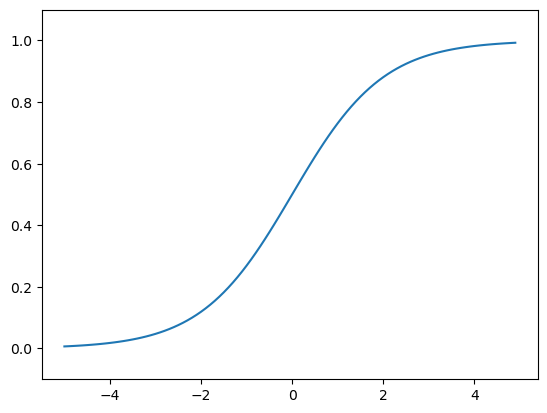

In [13]:
# 73p
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [18]:
# 82p 1-layer neural network
X = np.array([1, 2])                 # 1x2
W = np.array([[1, 3, 5], [2, 4, 6]]) # 2x3
Y = np.dot(X, W)                     # 1x3
print(X)
print(X.shape, end="\n\n")
print(W)
print(W.shape, end="\n\n")
print(Y)

[1 2]
(2,)

[[1 3 5]
 [2 4 6]]
(2, 3)

[ 5 11 17]


In [20]:
X = np.array([1.0, 0.5])                          # 1x2
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 2x3

# 다음 노드 마다 반영되는 바이어스 값
# 총 3개의 노드에 대한 바이어스 값
B1 = np.array([0.1, 0.2, 0.3])
print(X.shape, W1.shape, B1.shape)

A1 = np.dot(X, W1) + B1

(2,) (2, 3) (3,)


In [21]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [24]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape, W2.shape, B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

(3,) (3, 2) (2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [27]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
print(Z2.shape, W3.shape, B3.shape)

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(A3)
print(Y)

(2,) (2, 2) (2,)
[0.31682708 0.69627909]
[0.31682708 0.69627909]


In [29]:
def init_network():
    network = {}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])    # 2x3
    network["b1"] = np.array([0.1, 0.2, 0.3])                       # 1x3
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # 3x2
    network["b2"] = np.array([0.1, 0.2])                            # 1x2
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])              # 2x2
    network["b3"] = np.array([0.1, 0.2])                            # 1x2

    return network

def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    B1, B2, B3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + B1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + B2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + B3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5]) # 1x2
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [30]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [33]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [35]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    B1, B2, B3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + B1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + B2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + B3
    y = softmax(a3)

    return y

In [41]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


In [44]:
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i : i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i : i + batch_size])

print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


### 이미 학습된 가중치에, network를 pickle로 숨김
### 이 부분을 스스로 학습 시키고, network을 직접 구현 할 필요가 있을 것임
### 학습과 같은 과정은 Chapter04에 있으므로 더 진행하고 검토하자.